# Model Selection 

In [26]:
import numpy as np 
import pandas as pd


In [38]:
def plot_confusion_matrix(cm):
    import matplotlib.pyplot as plt
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Female','Male']
    plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [27]:
consumers= pd.read_csv('ecommerce_consumers.csv')

In [28]:
consumers.head()

,ratio,time,label
0,0.54,17.2,female
1,0.93,18.2,male
2,0.84,13.6,female
3,0.19,6.0,male
4,0.89,13.2,female


In [29]:
consumers['class'] = np.where(consumers['label']=='female',0,1)
y = consumers['class']
X = consumers.drop(['label','class'],axis=1)

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

logit_pred = logit_model.predict(X_test)

print('Accuracy of logistic regression model on test is:',accuracy_score(y_test,logit_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,logit_pred)

print(cm)

Accuracy of logistic regression model on test is: 0.8
[[ 0 10]
 [ 0 40]]


In [32]:
sum(y_test)

40

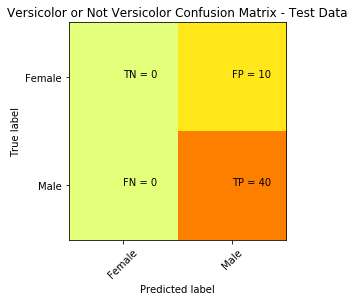

In [39]:
plot_confusion_matrix(cm)

## SVM Model with Radial Basis Function

In [41]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=0)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print('Accuracy of logistic regression model on test is:',accuracy_score(y_test,svm_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,svm_pred)

print(cm)

Accuracy of logistic regression model on test is: 0.92
[[10  0]
 [ 4 36]]


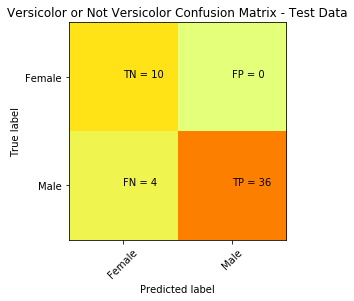

In [42]:
plot_confusion_matrix(cm)

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 100,
#                                max_depth=3, min_samples_leaf=5)

# clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
#                                  max_depth=3, min_samples_leaf=5)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

print('Accuracy of logistic regression model on test is:',accuracy_score(y_test,tree_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,tree_pred)

print(cm)

Accuracy of logistic regression model on test is: 1.0
[[10  0]
 [ 0 40]]


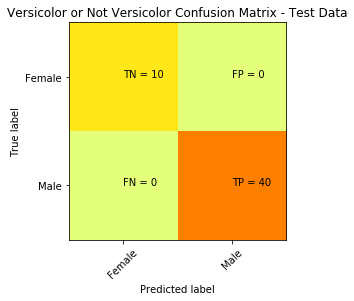

In [46]:
plot_confusion_matrix(cm)

# Pros
    1. Logistic regression
        * It is convenient for generating probability scores.
        * Efficient implementation is available across different tools.
        * The issue of multicollinearity can be countered with regularisation.
        * It has widespread industry use.
        
    2. Decision trees
        * Intuitive decision rules make it easy to interpret.
        * Trees handle nonlinear features well.
        * The variable interaction is taken into account.
        
    3. Support vector machines
        * SVMs can handle large feature space.
        * These can handle nonlinear feature interaction.
        * They do not rely on the entire dimensionality of the data for the transformation.
        
        
# Cons
    1. Logistic regression
        * It does not perform well when the features space is too large.
        * It does not perform well when there are a lot of categorical variables in the data.
        * The nonlinear features have to be transformed to linear features in order to efficiently 
            use 7them for a logistic model.
        * It relies on entire data i.e. if there is even a small change in the data, the logistic 
            model can change significantly.
        
    2. Decision trees
        * Trees are highly biased towards the training set and overfit it more often than not.
        * There is no meaningful probability score as the output.

    3. Support vector machines
        * SVMs are not efficient in terms of computational cost when the number of observations is large.
        * It is tricky and time-consuming to find the appropriate kernel for a given data.

# Approch
Say you work for a large e-commerce company such as Amazon and need to build a classification model to classify a user as likely to buy / unlikely to buy. You have a large number of features and observations, and have to deploy the model in real time.

Compare the pros and cons of logistic regression, decision trees and support vector machines in such a case. Write your arguments and the final choice/approach in the box below.

Cons: 
1. Logistic regression might not perform as well as other algorithms in terms of accuracy and other such performance metrics because of the potential nonlinearity in the dataset. 
2. Decision trees are prone to overfit the data by creating complex rules which mug up the whole data. 
3. Support vector machines might not be appropriate for this task since it requires the model to be deployed in real time, and as discussed earlier, SVMs are resource hungry and slow as compared to other machine learning models. 

Pros: 
1. Since the project is to be deployed in real time, logistic regression and decision trees will be the right choice since they are faster to build than support vector machines. 
2. In general, support vector machines give a really good performance as compared to logistic regression or decision trees when the number of features is large. 

In the end, you have to test and compare all the models in terms of the following - 1. Predictive power (accuracy, sensitivity and specificity, AUC etc.), and 2. Computational cost After analysing the above, you have to choose the model that gives a right balance of both the goals.